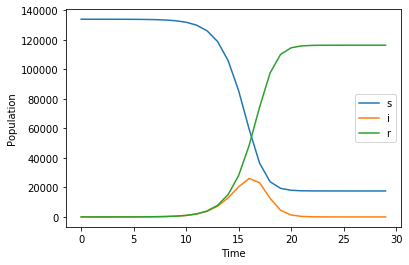

In [182]:
import matplotlib.pyplot as plt
import numpy as np
class SIR_Model():
    
    def __init__(self, s=133999, i=1, r=0, beta=2, gamma=1, Tmax=30):
        self._s = s
        self._i = i
        self._r = r
        self._beta = beta
        self._gamma = gamma
        self._Tmax = Tmax
        self._N = s + i + r
        
    def update(self):
        s_new = self._s - self._s*self._i*self._beta/self._N
        i_new = self._i + self._s*self._i*self._beta/self._N - self._gamma*self._i
        r_new = self._r + self._gamma*self._i
        self._s = s_new
        self._i = i_new
        self._r = r_new
        return self._s, self._i, self._r
    
    def evolve(self):
        s = [self._s,]
        i = [self._i,]
        r = [self._r,]
        t = range(self._Tmax)
        for time in range(self._Tmax-1):
            s_temp, i_temp, r_temp = self.update()
            s.append(s_temp)
            i.append(i_temp)
            r.append(r_temp)
        return s, i, r

    def time_of_peak(self):
        s, i, r = self.evolve()
        return np.argmax(i)
    
    def iValue_of_peak(self):
        s, i, r = self.evolve()
        return max(i)
    
    def plot_graph(self):
        s, i, r = self.evolve()
        t = range(self._Tmax)
        plt.plot(t,s,label='s')
        plt.plot(t,i,label='i')
        plt.plot(t,r,label='r')
        plt.xlabel("Time")
        plt.ylabel("Population")
        plt.legend()
        plt.savefig("README_img/EX3_1.png")
        plt.show()

sir = SIR_Model()
# sir = SIR_Model(beta=0.1, gamma=0.01, Tmax=1000)
sir.plot_graph()

In [179]:
print(f"The number of infected people peak at t = {SIR_Model().time_of_peak()}, and {round(SIR_Model().iValue_of_peak())} people are infected at the peak.")

The number of infected people peak at t = 16, and 26033 people are infected at the peak.


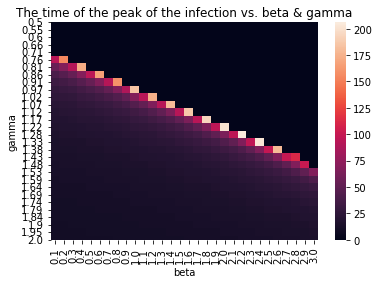

In [171]:
def heatplot_peak_of_time():
    x_lim = 30
    y_lim = 30
    peak_time = [[0]*x_lim for i in range(y_lim)]
    beta_x = np.linspace(0.1, 3, x_lim)
    gamma_y = np.linspace(0.5, 2, y_lim)
    for i in range(len(beta_x)):
        for j in range(len(gamma_y)):
            beta_x[i] = round(beta_x[i],2)
            gamma_y[i] = round(gamma_y[i],2)
            peak_time[i][j] = SIR_Model(beta=beta_x[i], gamma=gamma_y[j], Tmax=1000).time_of_peak()
    sns.heatmap(peak_time, xticklabels=beta_x, yticklabels=gamma_y)
    plt.xlabel("beta")
    plt.ylabel("gamma")
    plt.title("The time of the peak of the infection vs. beta & gamma")
    plt.savefig("README_img/EX3_2.png")
    plt.show()
    
heatplot_peak_of_time()

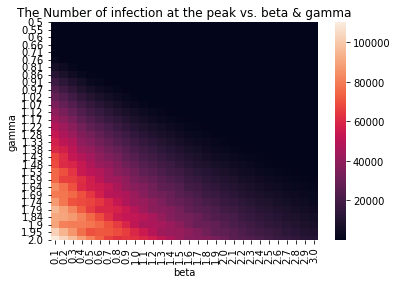

In [172]:
def heatplot_peak_of_number():
    x_lim = 30
    y_lim = 30
    peak_time = [[0]*x_lim for i in range(y_lim)]
    beta_x = np.linspace(0.1, 3, x_lim)
    gamma_y = np.linspace(0.5, 2, y_lim)
    for i in range(len(beta_x)):
        for j in range(len(gamma_y)):
            beta_x[i] = round(beta_x[i],2)
            gamma_y[i] = round(gamma_y[i],2)
            peak_time[i][j] = SIR_Model(beta=beta_x[i], gamma=gamma_y[j], Tmax=1000).iValue_of_peak()
    sns.heatmap(peak_time, xticklabels=beta_x, yticklabels=gamma_y)
    plt.xlabel("beta")
    plt.ylabel("gamma")
    plt.title("The Number of infection at the peak vs. beta & gamma")
    plt.savefig("README_img/EX3_3.png")
    plt.show()
    
heatplot_peak_of_number()